#### 0. Import basic methods from source.py
Import useful methods from source.py (NB: can later be integrated into a package)

In [1]:
from source import *

#### 1. Open xls file and ingest Inputs table
Note I am assuming that all inputs will be aggregated into one single inputs table

In [2]:
filename = r'Inputs.xlsx'

In [3]:
# load workbook
wb = load_workbook(filename)

In [4]:
# load worksheet
ws = wb["Python test sheet"]

In [5]:
mapping = {}

for entry, data_boundary in ws.tables.items():
    # parse the data within the ref boundary
    data = ws[data_boundary]
    # extract the data 
    # the inner list comprehension gets the values for each cell in the table
    content = [[cell.value for cell in ent] 
               for ent in data
          ]
    
    # find header
    header = content[0]
    
    # find the rest ... the contents, excluding the header
    rest = content[1:]
    
    # create dataframe with the column names
    # and pair table name with dataframe
    df = pd.DataFrame(rest, columns = header)
    mapping[entry] = df

In [7]:
Inputs = pd.DataFrame(mapping['Inputs'])
Inputs.head()

,Sub-system,Element,Component,Type,Description,Number,Unit,Category
0,Wind energy source & Transport,Offshore wind park,Foundations,Capex,Construction duration,3,years,Capex
1,Wind energy source & Transport,Offshore wind park,Foundations,Capex,Capex allocation,"0.4, 0.3, 0.3",-,Capex
2,Wind energy source & Transport,Offshore wind park,Foundations,Capex,Jacket or monopile costs (Development and Proj...,100000,€ / unit,Development and Project Management
3,Wind energy source & Transport,Offshore wind park,Foundations,Capex,Jacket or monopile costs (Procurement),400000,€ / unit,Procurement
4,Wind energy source & Transport,Offshore wind park,Foundations,Capex,Jacket or monopile costs (Installation),300000,€ / unit,Installation


#### Select one item from the Inputs table (generate cashflow overview)

In [47]:
df = Inputs_2_cashflow(Inputs, startyear=2022, lifecycle=11, Debug=False)

In [48]:
df_npv = calculate_npv(df)

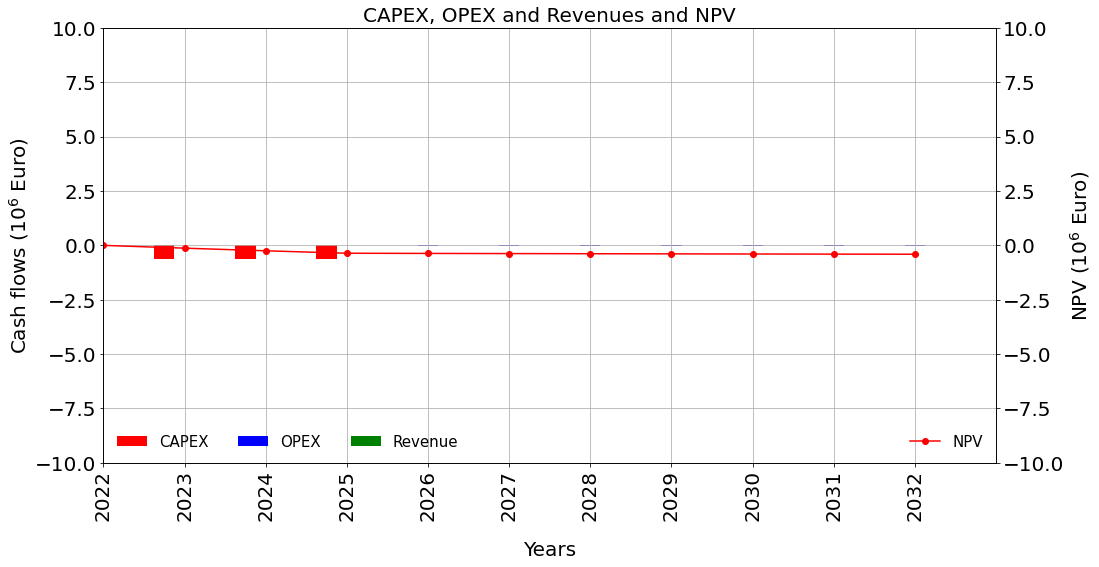

In [49]:
create_npv_plot(df_npv)